# <font color=green> Global Warming Science</font>
#### https://courses.seas.harvard.edu/climate/eli/Courses/EPS101/

# Hurricanes 
(thanks to Yonathan Vardi 2019-07-09)


### <font color=red> Please use the template below to answer the workshop questions. "XX" indicates places where you need to complete/write code or add a discussion.</font>

## Your name:

In [ ]:
# load libraries and get data:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from IPython import get_ipython
from scipy.stats import linregress

# load data from pickle file:
# ---------------------------
with open('./hurricanes_variables.pickle', 'rb') as file:
        d = pickle.load(file)
        # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key, "; size=", d[key].shape)
            #print("; type=",type(d[key]))
        globals().update(d)

## explanation of variables

PDI, PDI_years: time series of power dissipation index and the years corresponding to each value

SST,SST_years: time series of sea surface temperature (degree C) and corresponding time axis.

SST_RCP85, SST_RCP85_years: time series of projected temperature for RCP8.5 (Kelvin)

hurricanes_number/years: time series of estimated number of atlantic hurricanes

HURSAT_*: data for hurricane speed, every 6 hours for each hurricane.

## 1. Observations of the number of Atlantic hurricanes and of the PDI:


#### (a) Number of hurricanes per year: Plot the time series of the estimated
number of Atlantic hurricanes. Add a linear regression
line to examine whether there is a trend, calculating the p and r2
values, and discuss your results.

In [ ]:
plt.figure(dpi=300)
plt.plot(XX,XX)
plt.xlabel('year')
plt.ylabel('# of Atlantic hurricanes')
plt.grid(lw=0.25)

# calculate and plot regression:
x=hurricanes_number_years; y=hurricanes_number
fit=linregress(x, y); slope=fit.slope; intercept=fit.intercept;
# calculate line as intercept+slope*years:
fitted_line=XX+XX*XX 
plt.plot(XX,XX);


#### (b) Plot the time series of the PDI

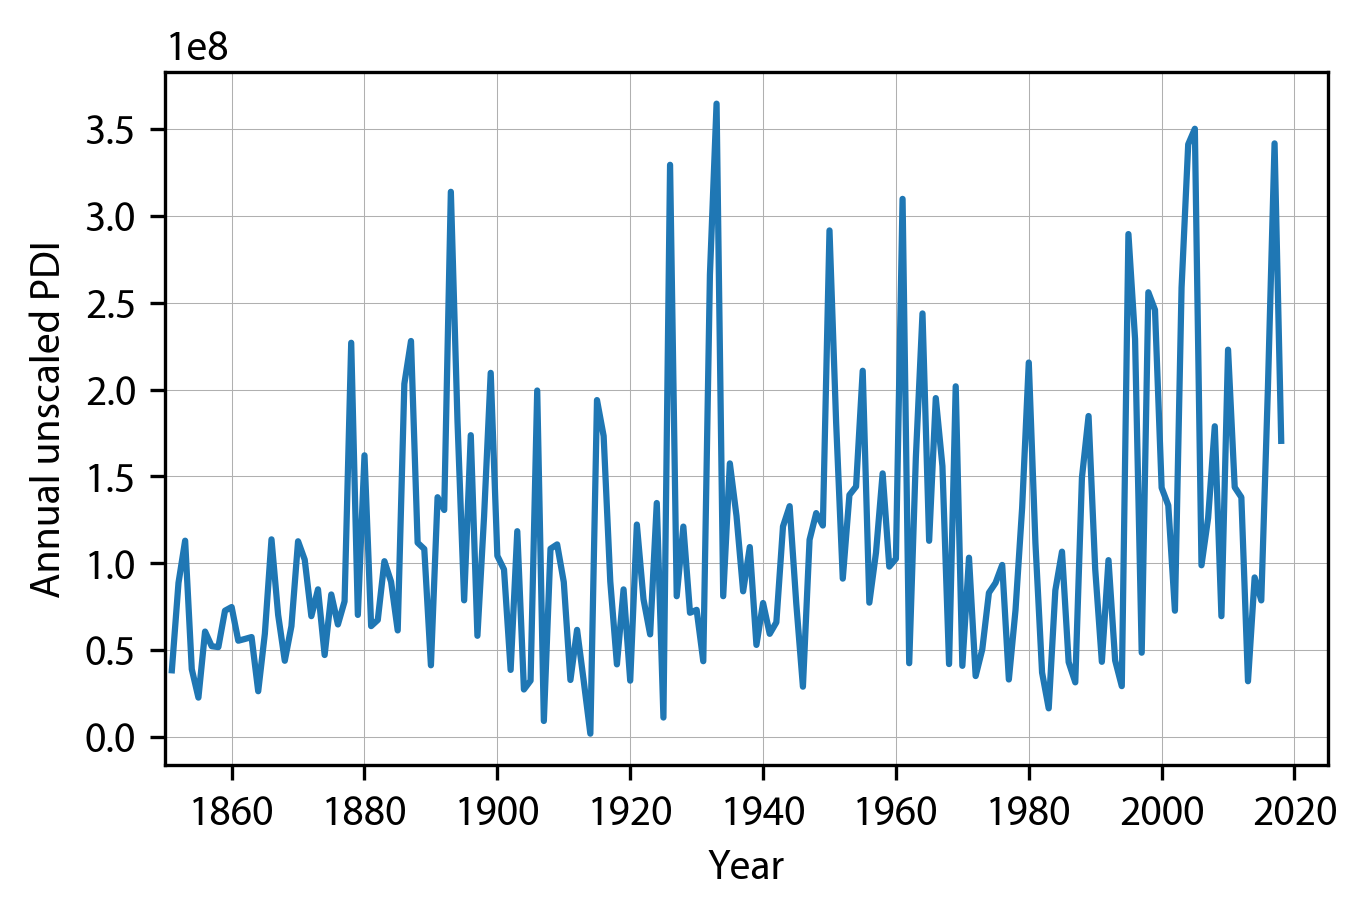

In [12]:
# plot the PDI time series:
# --------------------------
fig = plt.subplots(figsize=(5,3),dpi=300)
# labels:
plt.ylabel("XX")
plt.xlabel("XX")
# axis ranges:
plt.plot(XX, XX)
plt.grid(l)

#### (c) Smooth the two time series using two passes of a 1-2-1 filter ("running average"),
\begin{align*}
      \overline{T}_i=0.25T_{i-1}+0.5T_{i}+0.25T_{i+1}.
\end{align*}
#### Note that every pass requires eliminating the 1st and last data points, where the smoothing cannot be evaluated. Write the expression for the twice-smoothed temperature $\overline{\overline{T}}_i$ in terms of $T_i$. Over how many years is the average done in this case? 

### Plot the smoothed time series as thick lines over the un-smoothed ones shown as thin lines. 

#### Plot the PDI and the SST averaged over the Atlantic Main Development Area (MDR), on the same axes (using two separate $y$ axes).

In [ ]:
        
def smooth_time_series(data):
    """Apply one pass of 1-2-1 filter to input data.
    Inputs: data - a time series
    Output: smoothed data, two less in length then input, as first and last cannot be calculated
    """
    # one pass of smoothing:
    data_smooth = np.zeros(len(data))
    for j in range(1, len(data)-1):
        data_smooth[j]=.25*data[j-1] + 0.5*data[j] + 0.25*data[j+1]
    # return smoohted data without first and last values:
    return data_smooth[1:len(data)-1]


# calculate smoothed time series (2 passes) using above function:
# ----------------------------------------------------------------
# e.g., for the sst this is done using:
# first pass:
SST_smooth=smooth_time_series(SST)
SST_smooth_years=1.0*SST_years[1:len(SST_years)-1]
# second pass:
SST_smooth=smooth_time_series(SST_smooth)
SST_smooth_years=1.0*SST_smooth_years[1:len(SST_smooth_years)-1]
# for the PDI:
PDI_smooth=XX
PDI_smooth_years=XX
# perform a second pass of smoothing of the PDI:
XX 

In [ ]:
# plot the two time series on same time axis, using two vertical axes:
# --------------------------------------------------------------------
fig, axis_PDI = plt.subplots()
# add another y-axis for plotting PDI and SST on the same graph:
axis_SST = axis_PDI.twinx()
axis_PDI.set_ylabel("XX")
axis_SST.set_ylabel("XX")
axis_PDI.set_xlabel("XX")
axis_PDI.set_title("XX")

# plot the PDI on one y axis and the SST on another
axis_SST.plot(SST_years, SST, color="XX", linewidth=0.5,label="unsmoothed SST")
#XX plot smooth sst here
axis_PDI.plot(PDI_years, PDI, color="XX", linewidth=XX,label="XX")
#XX plot smooth PDI here

# show legend and display figure:
fig.legend()
plt.tight_layout()
plt.show()

## Smoothing details
given $\overline{T}_i=0.25T_{i-1}+0.5T_{i}+0.25T_{i+1}$, we have
$$\overline{\overline{T}}_i
=XX$$
so that two passes are equivalent to a XX-point running average.

#### (d) Correlation of SST and PDI: Calculate the correlation between the time series of the SST and PDI with and without smoothing for 1950 to 2005. Repeat using the data up to present-day. To calculate the correlation of the two time series, first remove their mean and then calculate the correlation by programming the explicit formula for correlation. Check your results using the NumPy function for calculating correlation. How would you justify calculating the correlation for the twice-smoothed data?

In [ ]:
# method 1: using a built-in numpy function
# call the function for unsmoothed values
builtin_r2 = np.corrcoef(PDI, SST)[0, 1]**2
print("built-in r² of PDI/SST (unsmoothed):", builtin_r2)
# call the function for smoothed values
builtin_r2 = np.corrcoef(PDI_smooth, SST_smooth)[0, 1]**2
print("built-in r² of PDI/SST (smoothed):  ", builtin_r2)


# calculate "short" time series, with only for the years 1950-2005:
PDI_smooth_short=PDI_smooth[np.logical_and(PDI_smooth_years>XX,PDI_smooth_years<XX)]
PDI_smooth_short_years=XX
# print years selected as a check:
print("PDI_smooth_short_years=",PDI_smooth_short_years)
SST_smooth_short=XX
builtin_r2_short = XX
print("built-in r² (smoothed, 1950-2005 only):  ", builtin_r2_short)


# method 2: an explicit calculation of correlation
def my_calc_correlation(X,Y):
    # remove mean from X:
    X=X-np.mean(X)
    # remove mean from Y:
    Y=XX
    C_XY= XX # calculate using np.sum and np.sqrt
    return C_XY

# call the function for unsmoothed values
my_r2 = my_calc_correlation(PDI, SST)
print("my r² of PDI/SST (unsmoothed):", my_r2**2)
# call my_calc_correlation again for smoothed values
my_r2 = XX
print("my r² of PDI/SST (smoothed):  ", my_r2**2)


# repeat for 1950 to end of data following the same procedure used above 
# for the full time series:
XX

## 2. Potential intensity:


#### (a) Plot the saturation specific humidity as a function of time based on the observed MDR SST and the SST increase projected by 2100 under the RCP8.5 scenario.

In [ ]:
def q_sat(T,P):
    # saturation specific humidity (g water vapor per g moist air):
    # inputs:
    # T: temperature, in Kelvin
    # P: pressure, in mb

    R_v = 461 # Gas constant for moist air = 461 J/(kg*K)
    R_d = 287 # Gas constant 287 J K^-1 kg^-1
    TT = T-273.15 # Kelvin to Celsius
    # Saturation water vapor pressure (mb) from Emanuel 4.4.14 p 116-117: 
    ew = 6.112*np.exp((17.67 * TT) / (TT + 243.5))
    # saturation mixing ratio (g water vapor per g dry air):
    rw = (R_d / R_v) * ew / (P - ew)
    # saturation specific humidity (g water vapor per g moist air):
    qw = rw / (1 + rw)
    return qw


# calculate for plotting saturation moisture as function of temperature:
T_plot=np.arange(-10.0,35.0,1.0)+273.15
q_plot=T_plot*0.0
P_surface=1000
for i in range(0,len(T_plot)):
    q_plot[i]=q_sat(T_plot[i],P_surface)


# calculate and plot saturation moisture for observed and projected MDR SST:
qsat=SST*0
for i in range(0,len(SST)):
    qsat[i]=q_sat(SST[i]+273.15,P_surface)

qsat_RCP85=SST_RCP85*0
for i in range(0,len(SST_RCP85)):
    qsat_RCP85[i]=XX

plt.figure(1,figsize=(14,5))
plt.subplot(1,3,1)
plt.plot(T_plot,q_plot,color="green")
plt.ylabel("$q_{sat}$")
plt.xlabel("T")

plt.subplot(1,3,2)
plt.plot(SST_years,SST,color="XX",label="historical SST")
XX plot also RCP case
plt.ylabel("XX")
plt.xlabel("XX")
plt.legend()

plt.subplot(1,3,3)
plt.plot(SST_years,qsat,color="green",label="historical")
XX plot also RCP case
plt.ylabel("qsat (kg/kg)")
plt.xlabel("year")
plt.legend()

plt.tight_layout()
plt.show()

#### (b) Calculate and plot the expected potential intensity as a function of time for the observed (historical) MDR SST and for the projected MDR SST increase by year 2100 under the RCP8.5 scenario (plotting the raw PI, with the smoothed time series superimposed).

In [ ]:
def calc_potential_intensity_wind_speed_from_SST(sst):
    """Calculate the potential intensity given a sea surface temperature.
    Input: sst- Sea surface temperature, in degrees Celsius
    Output: Return a velocity in m/s
    """
    sst = sst + 273.15 # convert to Kelvin
    epsilon = (1/3)    # efficiency of Hurricane as a carnot engine
    L = 2260*1000      # latent heat of vaporization of water
    PI=sst*0           # initialize array of potential intensity
    for i in range(0,len(sst)):
        q = q_sat(sst[i], 1000) # assumes that pressure is always 1000mb (sea level)
        PI[i] = np.sqrt(epsilon*L*0.15*q)
    return PI


# calculate Potential Intensity (PI) for observed atlantic MDR SST hurricane season record:
PI_SST_MDR_hurricane_season = calc_potential_intensity_wind_speed_from_SST(SST)
PI_SST_MDR_hurricane_season_years=SST_years
PI_SST_MDR_hurricane_season_smooth=smooth_time_series(PI_SST_MDR_hurricane_season)
PI_SST_MDR_hurricane_season_smooth_years=SST_years[1:len(SST_years)-1]

# calculate PI for RCP8.5 atlantic MDR SST hurricane season record:
PI_rcp_SST_MDR_hurricane_season = XX
PI_rcp_SST_MDR_hurricane_season_years=XX
PI_rcp_SST_MDR_hurricane_season_smooth=XX
PI_rcp_SST_MDR_hurricane_season_smooth_years=XX


# plot smoothed Huricane season PI and SST:
# ------------------------------------------
fig1, ax1 = plt.subplots()
plt.ylabel("Potential Intensity (m/s)")
plt.xlabel("Year")
plt.title("Hurricane season Potential Intensity")
plt.plot(XX,XX
         ,label="PI (from smoothed historical SST)",lw=2)
plt.plot(XX,XX
         ,label="PI (from smoothed RCP8.5 SST)",lw=2)

# plot un-smoothed MDR potential intensity:
# -----------------------------------------
plt.plot(XX,XX, "g-"
         ,label="PI (from historical SST)",lw=0.25)
plt.plot(XX,XX
         ,color="coral", label="PI from RCP8.5 SST)",lw=0.25)
plt.legend()
plt.show()


#### (c) Calculate and plot time series of the cube of the PI to approximate the PDI, and normalize by the mean of the PDI calculated from the historical SST. What is the expected percent increase in PDI by the end of the century? Remember that PDI is a measure of hurricane destructiveness.

In [ ]:
# plot cubed PI, approximating the PDI:
# --------------------------------------
# normalize by mean of PDI calculated from historical SST:
PDI=XX
mean_PDI=np.mean(PDI)
PDI_normalized=PDI/mean_PDI
PDI_RCP85=PXX
PDI_RCP85_normalized=PDI_RCP85/mean_PDI
plt.figure(figsize=(10,5))
plt.plot(XX,XX
         ,"g-",label="PDI (from historical SST)")
plt.plot(XX,XX
         ,color="coral", label="PDI (from RCP8.5 SST)")
plt.ylabel("normalized PDI (PI$^3$)")
plt.xlabel("year")
plt.title("cubed PI, as an approximation of PDI, normaized by mean historical value.")
plt.legend()
plt.tight_layout()
plt.show()

## 3. Optional extra credit: Detecting ACC in hurricane intensity: Calculate the fraction of major hurricanes every year and plot it as a function of time. Repeat after averaging in bins of three years. Calculate and plot a linear fit with and without the binning, and calculate the $r^2$ in each case. Discuss your results.

In [ ]:
# Loop through every windspeed of every hurricane. If greater than 100
# knots, increase major hurricane and total hurricane count by 1, 
# else if greater than 65 knots, increase only total hurricane count by 1
# (following Kossin et al 2020. They ignore 1978 and 1980 due to data quality issues; their 
#   first 3-year average is therefore over 1979, 1980 (no data) and 1981)

for ind, hurricane_6hourly_winds in enumerate(HURSAT_wind_speed):
      # print ind,  HURSAT_years[ind] and hurricane to understand data structure and take it from there. 
      print(ind,HURSAT_years[ind],hurricane_6hourly_winds)
